# Demo: Excel Replication
The NAM package is based on an older excel-based implementation of the model.

A single run from this package is available within the package, and this notebook aims to replicate the results from this run.

Note that we can use the NAMParametersMock class for parameters. This class does not implement optimization, but allows parameters that take on boundary values, e.g. 0. Since this is the case for the excel test (default parameters), it is needed to have exact replication.

In [1]:
from jax import numpy as jnp
import jax
jax.config.update("jax_enable_x64", True)
from matplotlib import pyplot as plt
from nam_classic import nam_excel_hydroapi
from nam_classic import nam_plus_hydro_api
import data

In [2]:
default_params = nam_excel_hydroapi.NAMParameters.from_physical()
excel_model = nam_excel_hydroapi.NAM(default_params)

In [3]:
_, excel_predictions = excel_model.predict(data.observations)

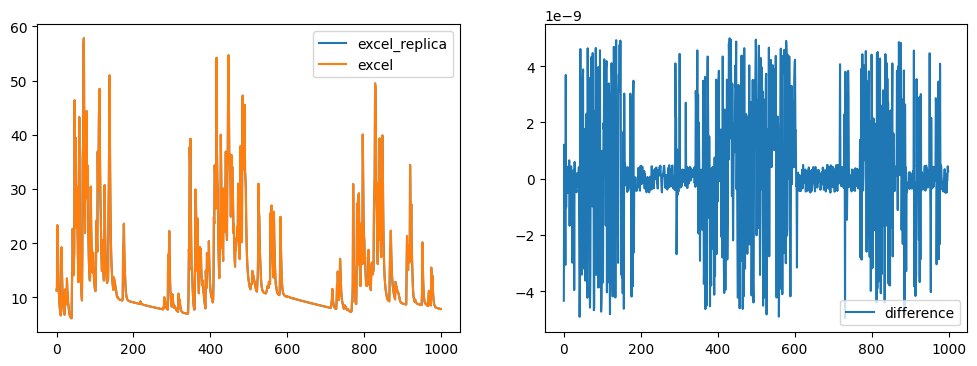

In [4]:
window = slice(1000, 2000)
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
axs[0].plot(excel_predictions[window], label="excel_replica")
axs[0].plot(data.nam_excel_results["qsim"].iloc[window].to_numpy(), label="excel")
axs[0].legend()
axs[1].plot(excel_predictions[window]-data.nam_excel_results["qsim"].iloc[window].to_numpy(), label="difference")
for ax in axs:
    ax.legend()

## Comparison between Excel and NAM+

In [5]:
plus_model = nam_plus_hydro_api.NAMPlus(default_params)
_, plus_predictions = plus_model.predict(data.observations)

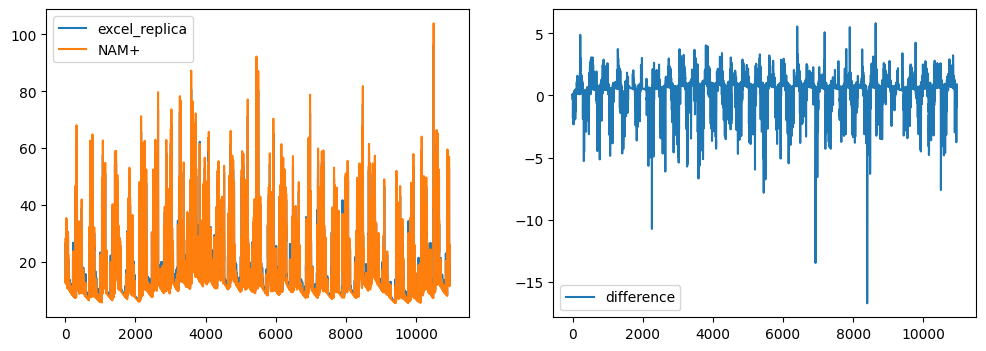

In [6]:
window = slice(1000, 2000)
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
axs[0].plot(excel_predictions, label="excel_replica")
axs[0].plot(plus_predictions, label="NAM+")
axs[0].legend()
axs[1].plot(excel_predictions-plus_predictions, label="difference")
for ax in axs:
    ax.legend()